In [1]:
# Sampling distribution lecture code for BSOS233
# created by Jacob J. Coutts

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline # need this to show plots in notebook
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# create function to count votes
def election_sim(n):
    vote = make_array("yes", "no")
    votes = np.random.choice(vote, n)
    prop_yes = np.count_nonzero(votes == "yes")/n
    return prop_yes

iterations = 1000 # set number of iterations
n=810 # set number of voters in sample
election_results = make_array() # create empty array to store results

# simulate 1000 times and store results in vector
for i in np.arange(iterations):
    election_results=np.append(election_results,election_sim(n))

In [3]:
# alternative approach
trials = 1000 # set number of iterations
res = make_array() # create an empty array to store results
n = 810 # set number of voters in sample

# simulation 1000 times and store results in vector
for i in np.arange(trials):
    one_sim = sample_proportions(n, make_array(.5, .5))[1]
    res = np.append(res, one_sim)

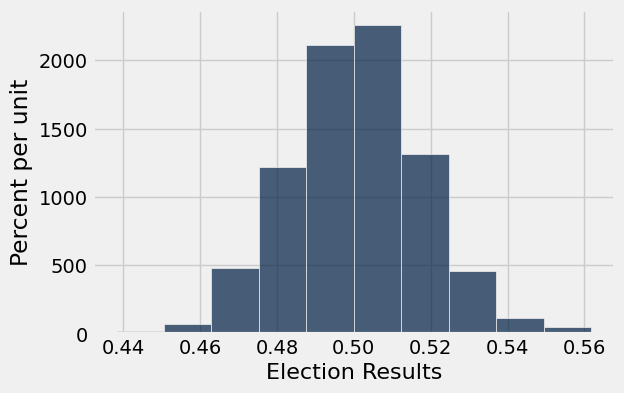

In [4]:
# convert to table so we can visualize with histogram
tot_res = Table().with_columns(
    "Election Results", election_results,
)
tot_res.select("Election Results").hist()

In [5]:
# dicey example
# create fair dice for null
def roll_sim(n):
    die = np.arange(1, 21)
    rolls = np.random.choice(die, n)
    total_ones = np.count_nonzero(rolls == 1)
    prop_ones = total_ones/n
    return prop_ones 

repetitions = 1000 # set number of iterations
n=100 # set number of rolls
results = make_array() # create empty array to store results

# do this 1000 times to create empirical sampling distribution under the null
for i in np.arange(repetitions):
    results = np.append(results, roll_sim(n))

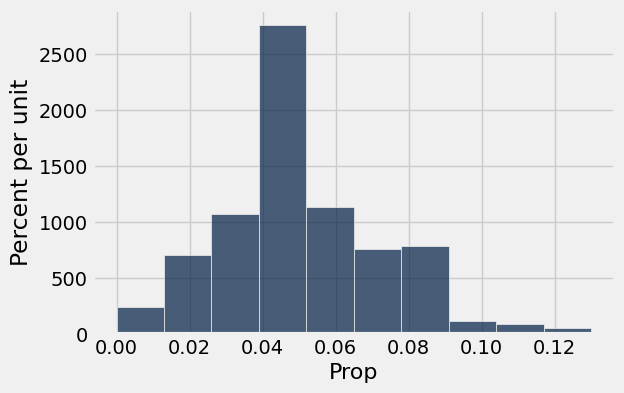

In [6]:
# convert to table to visualize with histogram
tot_res = Table().with_columns(
    "Prop", results,
)
tot_res.select("Prop").hist()

In [7]:
# calculate p-value which is propotion above the observed with a one-tailed
observed_value=.09 # observed in our study
np.count_nonzero(results >= observed_value)/repetitions # >= because we're looking for values as or more extreme
# .065 is greater than .05, so we fail to reject. There is not enough evidence the die isn't fair.

0.065